<a href="https://colab.research.google.com/github/AashiDutt/AI-and-ML-for-Coders/blob/main/Chapter2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Introduction to Computer Vision

In [1]:
# Imports
import tensorflow as tf
import numpy as np

from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense

# Callbacks - stops training at a particular accuracy percentage to avoid overfitting

class myCallback(tf.keras.callbacks.Callback):
  def on_epoch_end(self, epoch, logs={}):
    if (logs.get('accuracy')  > 0.95):
      print("\n Reached 95% accuracy so cancelling training")
      self.model.stop_training = True

callbacks = myCallback()

#Data
data = tf.keras.datasets.fashion_mnist

#Train and Test split
(training_images, training_labels), (test_images, test_labels) = data.load_data()

#Normalize images (0 - 255)
training_images = training_images / 255.0
test_images = test_images / 255.0

#Define
model = Sequential([tf.keras.layers.Flatten(input_shape = (28, 28)),
                    tf.keras.layers.Dense(128, activation = tf.nn.relu),
                    tf.keras.layers.Dense(10, activation = tf.nn.softmax)])

#compile
model.compile(optimizer = 'adam', loss = 'sparse_categorical_crossentropy', metrics = ['accuracy'])

#fit
model.fit(training_images, training_labels, epochs = 50, callbacks=[callbacks])

#evaluate
model.evaluate(test_images, test_labels)


4431872/4422102 [==============================] - 0s 0us/step
Epoch 1/50
1875/1875 [==============================] - 5s 2ms/step - loss: 0.4989 - accuracy: 0.8243
Epoch 2/50
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3752 - accuracy: 0.8634
Epoch 3/50
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3369 - accuracy: 0.8780
Epoch 4/50
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3105 - accuracy: 0.8861
Epoch 5/50
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2923 - accuracy: 0.8927
Epoch 6/50
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2775 - accuracy: 0.8977
Epoch 7/50
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2661 - accuracy: 0.9013
Epoch 8/50
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2569 - accuracy: 0.9036
Epoch 9/50
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2445 - accuracy: 0.9095
Epoch 10/50
1875/18

[0.41626855731010437, 0.8927000164985657]

In [2]:
#Model output
classifications = model.predict(test_images)
print(classifications[0])
print(test_labels[0])

[2.1913089e-10 1.7043100e-17 1.8013788e-12 8.0357219e-15 9.3915726e-12
 1.3470435e-07 8.7073005e-15 7.2105104e-05 9.9283578e-15 9.9992776e-01]
9


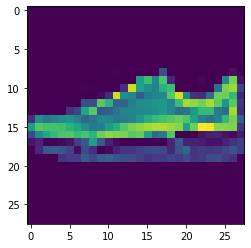

In [3]:
from matplotlib import pyplot
pyplot.imshow(test_images[9])

Blog Reference - https://machinelearningmastery.com/how-to-develop-a-cnn-from-scratch-for-fashion-mnist-clothing-classification/